In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advert_df = pd.read_csv("data/clean_advert.csv", index_col=[0])
advert_df.head(2)

,categories,Facebook,Instagram,Twitter,LinkedIn,WhatsApp,TikTok,Telegram,Snapchat,sales_score
0,Home Appliances,1,0,0,0,0,1,0,0,9
1,Clothing & Apparel,1,1,1,0,0,1,0,0,9


# Exploratory data analysis

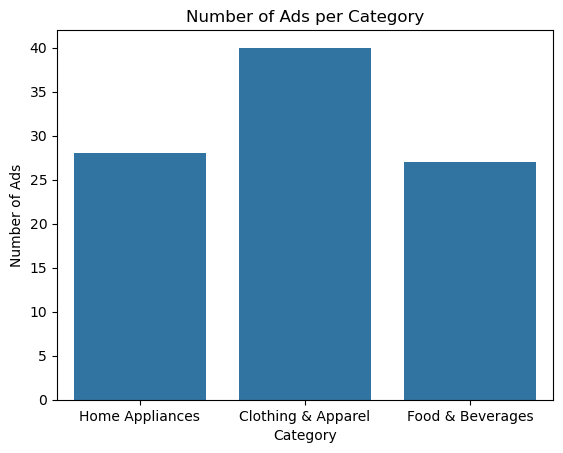

In [3]:
sns.countplot(x="categories", data=advert_df)
plt.title("Number of Ads per Category")
plt.xlabel("Category")
plt.ylabel("Number of Ads")
plt.savefig("images/number_of_ads_per_category")
plt.show()

In [4]:
advert_df["categories"].value_counts()

categories
Clothing & Apparel    40
Home Appliances       28
Food & Beverages      27
Name: count, dtype: int64

In [5]:
advert_df.groupby("categories")[["Facebook", "Instagram", "Twitter", "LinkedIn", "WhatsApp", "TikTok", "Telegram", "Snapchat"]].mean()

,Facebook,Instagram,Twitter,LinkedIn,WhatsApp,TikTok,Telegram,Snapchat
categories,,,,,,,,
Clothing & Apparel,0.550000,0.525000,0.275000,0.100000,0.825000,0.725000,0.125000,0.125000
Food & Beverages,0.444444,0.407407,0.259259,0.148148,0.888889,0.370370,0.148148,0.037037
Home Appliances,0.785714,0.464286,0.321429,0.107143,0.714286,0.571429,0.357143,0.142857


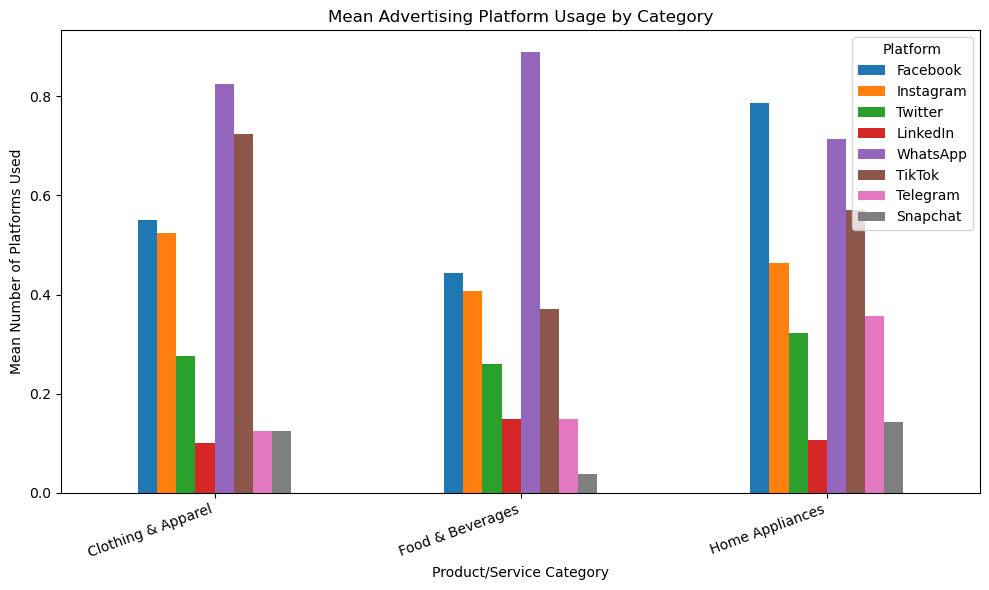

In [6]:
# plot new_df.groupby("categories").mean()
advert_df.groupby("categories")[["Facebook", "Instagram", "Twitter", "LinkedIn", "WhatsApp", 
                                  "TikTok", "Telegram", "Snapchat"]].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Mean Advertising Platform Usage by Category')
plt.xlabel('Product/Service Category')
plt.ylabel('Mean Number of Platforms Used')
plt.xticks(rotation=20, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.savefig("images/catergory_by_media.png")
plt.show()

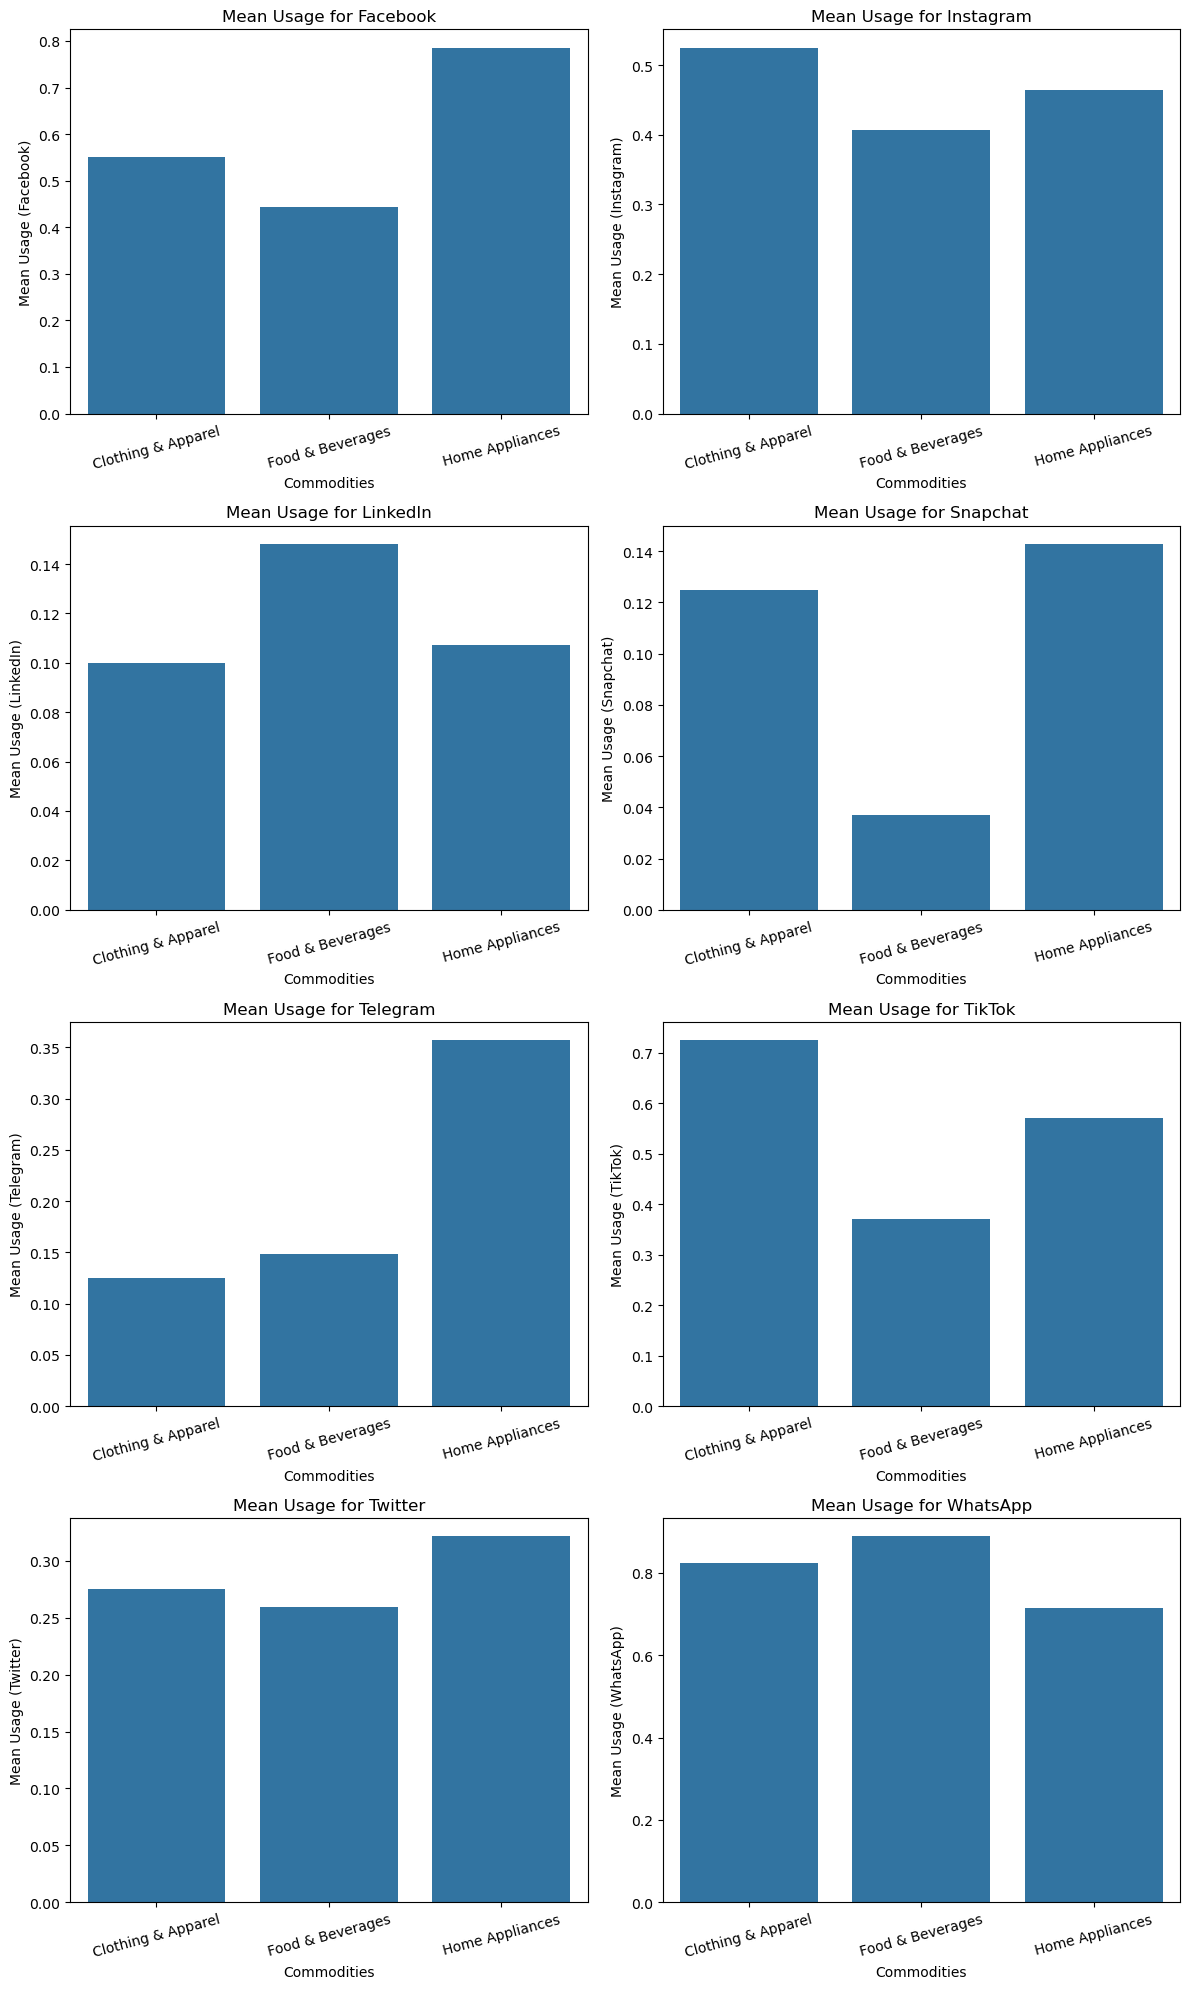

In [7]:
cats = ['Facebook', 'Instagram', 'LinkedIn', 'Snapchat', 'Telegram', 'TikTok', 'Twitter', 'WhatsApp']

# Determine the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(cats) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, cat in enumerate(cats):
    sns.barplot(x="categories", y=cat, data=advert_df.groupby("categories")[["Facebook", "Instagram", "Twitter", "LinkedIn", "WhatsApp", 
                                                                          "TikTok", "Telegram", "Snapchat"]].mean().reset_index(), ax=axes[i])
    axes[i].set_title(f'Mean Usage for {cat}')
    axes[i].set_xlabel('Commodities')
    axes[i].set_ylabel(f'Mean Usage ({cat})')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig("images/catergory_by_media_type.png")
plt.show()

# Regression Analysis

In [39]:
advert_df.head(2)

,categories,Facebook,Instagram,Twitter,LinkedIn,WhatsApp,TikTok,Telegram,Snapchat,sales_score
0,Home Appliances,1,0,0,0,0,1,0,0,9
1,Clothing & Apparel,1,1,1,0,0,1,0,0,9


In [36]:
from sklearn.linear_model import LinearRegression

In [51]:
def regression_linear_model(df):
    X = df.drop(columns=["categories", "sales_score"]).values
    y = df[["sales_score"]].values
    model = LinearRegression(positive=True, fit_intercept=False)
    model.fit(X, y)
    return model.coef_

# Regression model for Clothing & Apparel

In [52]:
cloth_model = regression_linear_model(advert_df[advert_df["categories"] == "Clothing & Apparel"])
cloth_model

array([[0.51323015, 0.        , 1.8095357 , 0.        , 4.21979531,
        3.47391413, 0.        , 0.        ]])

# Regression model for Food & Beverages

In [53]:
food_model = regression_linear_model(advert_df[advert_df["categories"] == "Food & Beverages"])
food_model

array([[0.66579889, 0.        , 0.        , 1.15587374, 6.02961276,
        1.8122356 , 0.        , 0.        ]])

# Regression model for Home Appliances

In [54]:
home_model = regression_linear_model(advert_df[advert_df["categories"] == "Home Appliances"])
home_model

array([[3.56423499, 0.        , 0.15171078, 0.        , 3.09715946,
        3.46868948, 0.        , 0.        ]])

# Modelling

In [79]:
def Options(inpt):
    if inpt == "Yes":
        return 1
    else:
        return 0     

def result(val):
    if val <= 4:
        return "Low impact on sales"
    elif val <= 7:
        return "Moderate impact on sales"
    else:
        return "High impact on sales"

def sales_score_prediction(typee, fb, ig, tw, lin, wb, tik, tg, sc):
    social_media_used = np.array([Options(fb), Options(ig), Options(tw), 
                                  Options(lin), Options(wb), Options(tik), Options(tg), Options(sc)])
    coef = regression_linear_model(advert_df[advert_df["categories"] == typee])
    if typee == "Clothing & Apparel":
        return result(np.dot(coef, social_media_used)[0])
    elif typee == "Food & Beverages":
        return result(np.dot(coef, social_media_used)[0])
    elif typee == "Home Appliances":
        return result(np.dot(coef, social_media_used)[0])

In [80]:
sales_score_prediction("Clothing & Apparel","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes")

'High impact on sales'

# Gradio

In [82]:
import gradio as gr

In [85]:
iSales = gr.Interface(
    fn=sales_score_prediction,
    inputs=[gr.Dropdown(label="Your Message", choices=["Clothing & Apparel", "Food & Beverages", "Home Appliances"]), 
            gr.Dropdown(label="Do you use Facebook for your advertisement?", choices=["Yes", "No"]), 
            gr.Dropdown(label="Do you use Instagram for your advertisement?", choices=["Yes", "No"]),
           gr.Dropdown(label="Do you use Twitter/X for your advertisement?", choices=["Yes", "No"]),
           gr.Dropdown(label="Do you use LinkedIn for your advertisement?", choices=["Yes", "No"]),
           gr.Dropdown(label="Do you use WhatsApp for your advertisement?", choices=["Yes", "No"]),
           gr.Dropdown(label="Do you use TikTok for your advertisement?", choices=["Yes", "No"]),
           gr.Dropdown(label="Do you use Telegram for your advertisement?", choices=["Yes", "No"]),
           gr.Dropdown(label="Do you use SnapChat for your advertisement?", choices=["Yes", "No"])],
    
    outputs=gr.Text(label="Report"),
    title="Sales Prediction",
    description="It gives sales prediction with respect to types of social media use for advertisement"
)

iSales.launch(share=True)

* Running on local URL:  http://127.0.0.1:7864
* Running on public URL: https://84f7123d9464a749c2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
